# Regresión logística y descenso del gradiente


__Autor:__ Sergio Casares Fernández

# 1. Introducción al Trabajo

El trabajo versará acerca del cálculo del desdenso del gradiente y la regresión logística en base a un dataset (4_1_data), el cual trata de puntuaciones en dos exámenes (columna 1 y 2) y otra donde aparece si esa persona ha sido aceptado o no (columna 3).

__La el procedimiento del cálculo del descenso del gradiente será el siguiente:__

* Importación de las librerías y el dataset y Visualización de Datos

* Descenso del Gradiente

    * Función Sigmoide
    
    * Función de coste
    
    * Normalización de los valores
    
    * Descenso del Gradiente
    
    * Visualización de la función de coste

* Predicción

* Bibliografía

### ¿Qué es una regresión logística?

La regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica en función de las variables independientes o predictoras.

Es útil para modelar la probabilidad de un evento ocurriendo como función de otros factores. El análisis de regresión logística se enmarca en el conjunto de Modelos Lineales Generalizados (GLM por sus siglas en inglés) que usa como función de enlace la función logit. Las probabilidades que describen el posible resultado de un único ensayo se modelan, como una función de variables explicativas, utilizando una función logística.



### ¿Qué es el Descenso del Gradiente?

El descenso del gradiente es un cálculo que nos permite saber cómo ajustar los parámetros de la red de tal forma que se minimice su desviación a la salida. También se define como un algoritmo para encontrar un mínimo de una función .

El gradiente es la generalización vectorial de la derivada, es un vector de tantas dimensiones como la función y cada dimensión contiene la derivada parcial en dicha dimensión.

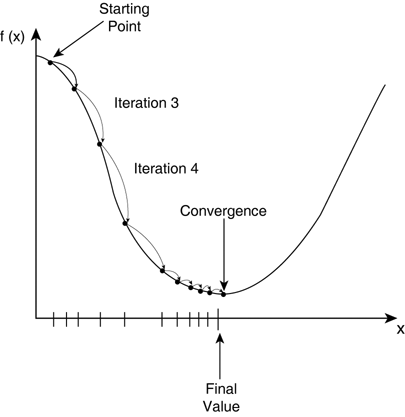

### 2. Importación de librerías y dataset

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
df=pd.read_csv("4_1_data.csv",skiprows = 1, header=None) #skiprows
df

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


#### 2.1. Transformación del Dataset (X e Y), descripción y visualización del dataset

Dividiremos el Dataset en dos valores, (X e Y), 'X' representará las dos primeras columnas, que son donde aparecen las notas de los dos exámenes realizados y la 'Y' es la columna que representa (con 0 y 1) si la persona es aceptada o no.

In [155]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [156]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [157]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Como se puede observar, realizamos la visualización de los datos de la puntuación en los examenes y si esa persona ha aprobado o no.

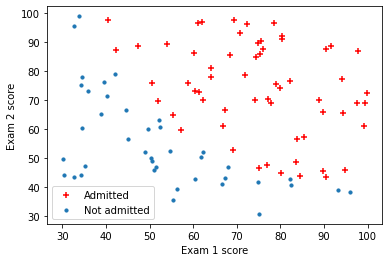

In [158]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1) #creo arrays de los valores Y que sean igual a 1 (pos) y a 0 (neg)

plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+") #muestra todos los valores de la columna 0 y la columna 1, color rojo y marker '+' siempre que sea 'pos', es decir, Y = 1
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10) #muestra todos los valores de la columna 0 y la columna 1, color azul y marker '0' siempre que sea 'neg', es decir, Y = 0
plt.xlabel("Exam 1 score") #nombre columna x
plt.ylabel("Exam 2 score") #nombre columna y
plt.legend(["Admitted","Not admitted"],loc=0) #creación de la leyenda

## 3. Cálculo del Descenso del Gradiente

### 3.1. Función Sigmoide

La función sigmoide transforma los valores introducidos a una escala (0,1), donde los valores altos tienen de manera asintótica a 1 y los valores muy bajos tienden de manera asintótica a 0.


Características de la función signoide:

* Satura y mata el gradiente.
* Lenta convergencia.
* No esta centrada en el cero.
* Esta acotada entre 0 y 1.
* Buen rendimiento en la última capa.
,

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Funci%C3%B3n_sigmoide_02.svg/450px-Funci%C3%B3n_sigmoide_02.svg.png' style = "width:350px; height:350px" align = 'center'>

In [159]:
def sigmoid(z):
    
    return 1/ (1 + np.exp(-z))

###  3.2. Función de Coste

Para poder saber cuál es la función que minimiza los errores de nuestra predicción, debemos realizar una __Función de Coste__, cuya función será la de minimizar los parámetros sobre nuestro dataset, para ello, nos basaremos en el MSE (erro cuadrático medio), el cual mide la diferencia entre el estimador (dataset) y el valor estimado (predicción).

<img src = 'https://miro.medium.com/max/440/1*20m_U-H6EIcxlN2k07Z7oQ.png' style = "width:300px; height:100px" align = 'center'>

In [160]:
def costFunction(theta, X, y):

    m=len(y) #longitud de la columna y
    #predictions es la función sigmoide de los valores de las dos columnas de x y de theta, np.dot te devuelve la multiplicación entre dos arrays
    predictions = sigmoid(np.dot(X,theta)) 
    #error mide el error de la predicción, si Y = 0, te calcula el logaritmo de 1 menos la predicción y si Y = 1, te calcula el logaritmo de la predicción
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    #cost mide el error aportado por cada predicción al total del error de la columna
    cost = 1/m * sum(error)
    #grad es el aporte individual de cada predicción con la transpuesta del array de X
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

### 3.3. Normalización de los valores

La función featureNormalization normaliza los valores de las columnas que forman el objeto X, es decir, los tipifica.

In [161]:
def featureNormalization(X):

    #mean obtiene la media de cada columna, la media de la columna 0 es 65,6 y la 2 es 66,2
    mean=np.mean(X,axis=0) 
    #std obtiene la desviación estandar de cada columna, std columna 0 = 19,45  y la std columna 2 = 18,58 
    std=np.std(X,axis=0)
    #X_norm normaliza los valores de las dos columnas restando a cada valor la media y dividiendo por la std (tipifica)
    X_norm = (X - mean)/std 
    
    return X_norm , mean , std #devuelve las columnas de X normalizadas, la media y la desv estándar

In [162]:
#m y n se refieren a cada una de las dos columnas, de valor 100 cada uno
m , n = X.shape[0], X.shape[1]
#retorna los valores de X, X_mean, X_std y los aplica a la función de featureNormalization(X)
X, X_mean, X_std = featureNormalization(X)
#X es igual a un array de tamaño m (100), pero con valores de 1
X= np.append(np.ones((m,1)),X,axis=1)
#Y es igual a una columna de tamaño m(100) y de una columna
y=y.reshape(m,1)
#initial_theta es un array de n (100) filas y una columna, llena de 0
initial_theta = np.zeros((n+1,1))
#cost, grad es la aplicación de la función costFunction aplicado a initial_theta, a X y a Y
cost, grad = costFunction(initial_theta,X,y)
#Imprime el valor del coste inicial de theta, que es 0.693
print("Cost of initial theta is",cost)
#imprime el valor inicial del gradiente, que es un array que indica el movimiento de la función de tamaño initial_theta -0.1, x - 0.28 e y -0.25
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.693147180559946
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### 3.4. Descenso del Gradiente

En este apartado desarrollaremos gradientDescent, cuya finalidad es la de descubri la función con un menor coste, la cual utiliza el número de iteraciones que la función debe realizar donde calcula el coste de la función en cada iteración

In [164]:
def gradientDescent(X,y,theta,alpha,num_iters):
 
    m=len(y) #m = 100
    J_history =[] #creación de un objeto donde se guardarán los valores de la función
    
    for i in range(num_iters): #función que indica el numero de iteraciones que vamos a realizar en la función creada
        cost, grad = costFunction(theta,X,y) #coste de la función por medio de los valores de tethea, X e y
        theta = theta - (alpha * grad) #theta es el valor de theta - alpha por el gradiente
        J_history.append(cost) #añade el valor generado en cost al objeto creado (y vacío) de J_history
    
    return theta , J_history

In [175]:
theta , J_history = gradientDescent(X,y,initial_theta,2,50) #alpha es el ratio de aprendizaje y num_iters es el numero de iteraciones realizadas

Text(0.5, 1.0, 'Cost function using Gradient Descent')

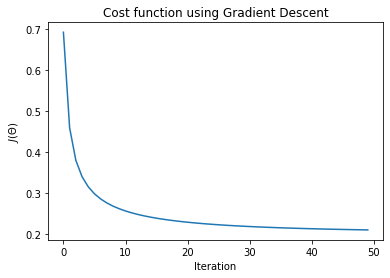

In [176]:
plt.plot(J_history) #plot del objeto creado con el conjunto de valores de coste obtenidos (valores de theta)
plt.xlabel("Iteration") #nombre eje x
plt.ylabel("$J(\Theta)$") #nombre eje y
plt.title("Cost function using Gradient Descent") #titulo de la gráfica

### 3.5. Visualización de la función de coste

Una vez obtenido el valor de la función con menor MSE, procedemos a visualizar los datos

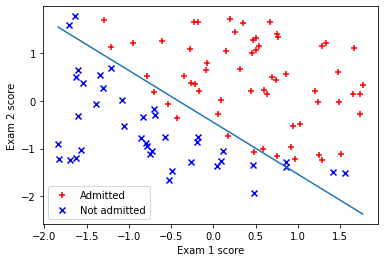

In [188]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted") # valores de x con y = 1
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted") # valores de x con y = 0

x_value= np.array([np.min(X[:,1]),np.max(X[:,1])]) #x_value es el array para el valor minimo del valor normalizado de la columna de X (-1.83, 1.76), medido en desv estandar
y_value=-(theta[0] + theta[1]*x_value)/theta[2] #y_value es el primer valor de theta + el segundo * el valor obtenido de x_value entre el valor de theta [2]
plt.plot(x_value,y_value) #línea formada por la función con el menor coste

plt.xlabel("Exam 1 score") #nombre columna x
plt.ylabel("Exam 2 score") #nombre columna y
plt.legend(loc=0) #legenda de admitido y no admitido

## 4. Predicción

Una vez concluido el cálculo de la función de coste y el descenso del gradiente, procederemos a valorar la predicción del modelo.

In [71]:
def classifierPredict(theta,X):

    predictions = X.dot(theta) #multiplicación del valor de theta por el array de X
    
    return predictions>0

In [197]:
x_test = np.array([50,85]) #valor aleatorio que asignamos
x_test = (x_test - X_mean)/X_std #valor del test menos la media
x_test = np.append(np.ones(1),x_test) #array con el valor del test
prob = sigmoid(x_test.dot(theta)) #predicción, valor del test por theta
print("For a student with scores 50 and 85, we predict an admission probability of",prob[0])

For a student with scores 50 and 85, we predict an admission probability of 0.8432433278430856


In [73]:
#cálculo para todos los valores del dataset
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %


## 5. Bibliografía


__Descenso del Gradiente:__

* https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica
* https://www.ellaberintodefalken.com/2019/03/regresion-lineal-descenso-de-gradiente.html
* https://www.ellaberintodefalken.com/2019/03/regresion-lineal-descenso-de-gradiente.html
* https://medium.com/@lachlanmiller_52885/machine-learning-week-1-cost-function-gradient-descent-and-univariate-linear-regression-8f5fe69815fd

__Función Sigmoide:__

* https://es.wikipedia.org/wiki/Funci%C3%B3n_sigmoide

__Función np.dot:__

* https://numpy.org/doc/stable/reference/generated/numpy.dot.html

__Repositorios Github:__

* https://github.com/Arko98/Gradient-Descent-Algorithms/tree/master/Algorithms
* https://github.com/Benlau93/Machine-Learning-by-Andrew-Ng-in-Python

__Squared Error:__

* https://datascience.stackexchange.com/questions/10188/why-do-cost-functions-use-the-square-error